In [5]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('bmh')
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Часть I

###1. Заявление прокурора
1% - это вероятность независимого события наличия такой редкой группы крови у любого жителя города. А прокурор определил её как условную вероятность наличия редкой группы крови и невиновности, что в корне не верно.
100% - 1% = 99% - это вероятность наличия любой другой группы крови у любого жителя города, и никак не вероятность виновности подсудимого. 
Правильно было бы оценить условную вероятность совершения убийства подсудимым при наличии у него редкой группы крови.

###2. Слово адвоката
Адвокат оценил вероятность нахождения одного убийцы среди 10,000 человек с редкой группой крови:
$$
\frac{1}{10000} * 100\% = 0.01\%
$$
Но убийство уже совершено, т.е. убийца среди этих 10,000 человек есть, так что данная оценка адвоката не несёт смысла. Опять таки, необходимо оценивать лишь  условную вероятность совершения убийства подсудимым при наличии у него редкой группы крови и условную вероятность не совершения убийства подсудимым при наличии у него редкой группы крови.

###3. Страшная болезнь

##Часть II

In [3]:
df = pd.read_csv("/content/drive/My Drive/colab_csv/covid_data.csv")

In [4]:
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [43]:
# выбираем данные по России от 2020-03-03
df['date'] = pd.to_datetime(df.date)
df = df[(df.location == 'Russia') & (df.date >= '2020-03-03')]
df.new_cases = df.new_cases.replace([0], 1)

In [44]:
# делим данные на тест и трейн
train = df.head(50).reset_index()
test = df[50:].reset_index()

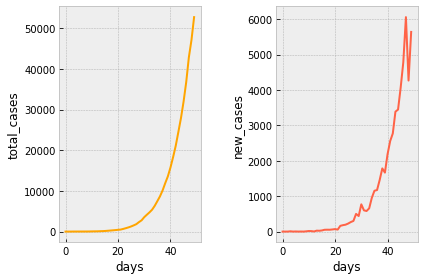

In [45]:
# Строим графики целевых переменных total_cases и new_cases
y1 = train.total_cases
y2 = train.new_cases
x = range(0, 50)

plt.subplot(1, 2, 1)
plt.plot(x, y1, 'orange')
plt.xlabel('days')
plt.ylabel('total_cases')

plt.subplot(1, 2, 2)
plt.plot(x, y2, 'tomato')
plt.xlabel('days')
plt.ylabel('new_cases')

plt.tight_layout(w_pad=3)
plt.show()

In [46]:
# Логарифмируем для обучения линейной регрессией
x = np.array(range(0, 50)).reshape(-1, 1)
y_1 = np.log(y1)   
y_2 = np.log(y2) 

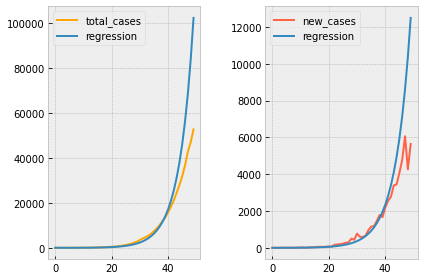

In [47]:
model = LinearRegression()

# Обучение регрессии и построение графика для total_cases
model.fit(x, y_1)
predicted_y_1 = lambda x: np.exp(model.coef_[0] * x + model.intercept_)

plt.subplot(1, 2, 1)
plt.plot(x, y1, label='total_cases', c='orange')
plt.plot(x, [predicted(i) for i in x.ravel()], label='regression')
plt.legend()

# Обучение регрессии и построение графика для new_cases
model.fit(x, y_2)
predicted_y_2 = lambda x: np.exp(model.coef_[0] * x + model.intercept_)

plt.subplot(1, 2, 2)
plt.plot(x, y2, label='new_cases', c='tomato')
plt.plot(x, [predicted(i) for i in x.ravel()], label='regression')
plt.legend()

plt.tight_layout(w_pad=3)

plt.show()